# Parameterization with the Open Force Field Toolkit
This notebook shows how to use the API of `peleffy` to parameterize a molecule with a force field from the Open Force Field initiative. Then, it generates the three files that PELE requires:
- Rotamer library
- Impact template
- Solvent parameters

## Example 1: benzene
This example shows how to load and parameterize the benzene molecule with `peleffy`.

### Load required files for this test

In [1]:
from peleffy.utils import get_data_file_path
bnz_pdb_path = get_data_file_path('ligands/benzene.pdb')

### Load `peleffy`'s molecule representation with a PDB file of benzene

In [2]:
from peleffy.topology import Molecule

 - Initializing molecule from PDB
   - Loading molecule from RDKit
   - Assigning stereochemistry from 3D coordinates
   - Setting molecule name to 'benzene'
   - Setting molecule tag to 'BNZ'
   - Representing molecule with the Open Force Field Toolkit
 - Generating rotamer library
   - Core set to the center of the molecule


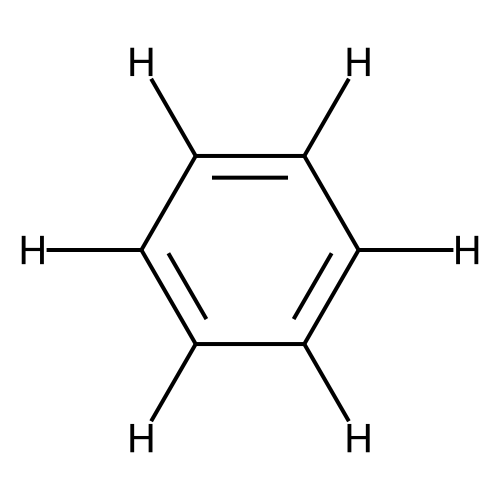

In [3]:
molecule = Molecule(bnz_pdb_path)
display(molecule)

### Generate the Rotamer library file
The `RotamerLibrary` method handles the rotamer library generation. Here, we are generating it and saving it to a file named __BNZ.rot.assign__.

In [4]:
from peleffy.topology import RotamerLibrary

In [5]:
rotamer_library = RotamerLibrary(molecule)
rotamer_library.to_file('BNZ.rot.assign')

### Parameterize with Open Force Field Toolkit and generate the Impact template
Please, note that before generating the Impact template, we need to parameterize the molecule using the `OpenForceField` class. Then, with the resulting parameters, we can generate the `Topology` representation of our molecule, which is required by the `Impact` template generator.

In this way, Impact template, named __bnzz__, can be built following these steps.

In [6]:
from peleffy.forcefield import OpenForceField
from peleffy.topology import Topology
from peleffy.template import Impact

In [7]:
openff = OpenForceField('openff_unconstrained-1.2.0.offxml')
parameters = openff.parameterize(molecule)

In [8]:
topology = Topology(molecule, parameters)

In [9]:
impact = Impact(topology)
impact.to_file('bnzz')

### Generate the Solvent parameters file
Please, note that before generating the Solvent parameters file, a `Topology` representation of the molecule has to be previously built, following the steps above.

Here, we generate the OBC2 Solvent parameters file, named __ligandParams.txt__.

In [10]:
from peleffy.solvent import OBC2

In [11]:
solvent = OBC2(topology)
solvent.to_file('ligandParams.txt')

 - Generating solvent parameters


## Example 2: oleic acid
This example shows how to load and parameterize the oleic acid molecule with `peleffy` with some customized settings.

### Load required files for this test

In [12]:
from peleffy.utils import get_data_file_path
olc_pdb_path = get_data_file_path('ligands/oleic_acid.pdb')

### Load `peleffy`'s molecule representation with a PDB file of oleic acid

In [13]:
from peleffy.topology import Molecule

 - Initializing molecule from PDB
   - Loading molecule from RDKit
   - Assigning stereochemistry from 3D coordinates
   - Setting molecule name to 'oleic_acid'
   - Setting molecule tag to 'OLC'
   - Representing molecule with the Open Force Field Toolkit
 - Generating rotamer library
   - Core set to the center of the molecule


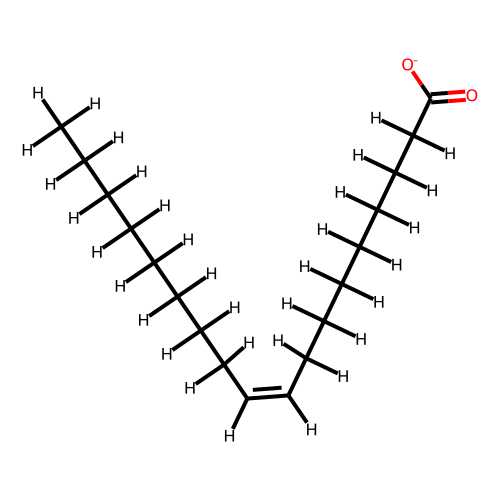

In [14]:
molecule = Molecule(olc_pdb_path, rotamer_resolution=60)
display(molecule)

### Generate the Rotamer library file
We are generating the Rotamer library and saving it to a file named __OLC.rot.assign__. Please, note that in this case the employed rotamer resolution is 60 degrees because we set the __rotamer_resolution__ to __60__ when initializing the `Molecule` class.

In [15]:
from peleffy.topology import RotamerLibrary

In [16]:
rotamer_library = RotamerLibrary(molecule)
rotamer_library.to_file('OLC.rot.assign')

### Parameterize with Open Force Field Toolkit and generate the Impact template
We parameterize the `Molecule`, using the __openff_unconstrained-1.2.0.offxml__ force field. However, in this case, we use another method to compute partial charges rather than the default one, the __gasteiger__ method.

Then, the Impact template, named __olcz__, is generated.

In [17]:
from peleffy.forcefield import OpenForceField
from peleffy.topology import Topology
from peleffy.template import Impact

In [18]:
openff = OpenForceField('openff_unconstrained-1.2.0.offxml')
parameters = openff.parameterize(molecule, charge_method='gasteiger')

In [19]:
topology = Topology(molecule, parameters)

In [20]:
impact = Impact(topology)
impact.to_file('olcz')

### Generate the Solvent parameters file
We generate the OBC2 Solvent parameters file, named __ligandParams.txt__.

In [21]:
from peleffy.solvent import OBC2

In [22]:
solvent = OBC2(topology)
solvent.to_file('ligandParams.txt')

 - Generating solvent parameters


## Example 3: anisole
This example shows how to load and parameterize the anisole molecule with `peleffy` from a SMILES tag.

### Load `peleffy`'s molecule representation with a PDB file of anisole

In [23]:
from peleffy.topology import Molecule

 - Initializing molecule from a SMILES tag
   - Loading molecule from RDKit
   - Setting molecule name to 'COc1ccccc1'
   - Representing molecule with the Open Force Field Toolkit
 - Generating rotamer library
   - Core set to the center of the molecule


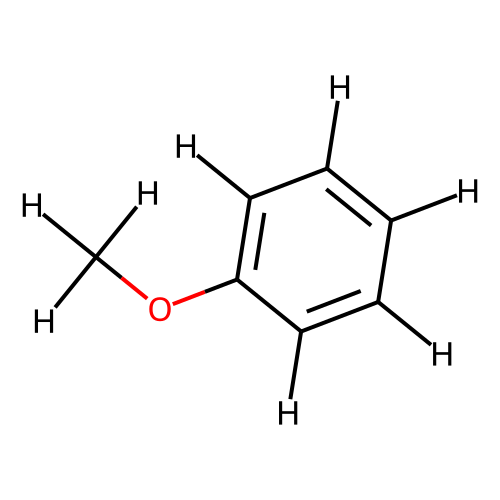

In [24]:
molecule = Molecule(smiles='COc1ccccc1', hydrogens_are_explicit=False)
display(molecule)

### Save PDB file for PELE
PELE still needs a PDB file to run a simulation. `peleffy` can extract a PDB file with the structure of the molecule with PDB atom names correctly assigned.

In [25]:
molecule.to_pdb_file('ANI.pdb')

### Generate the Rotamer library file
We are generating the Rotamer library and saving it to a file named __ANI.rot.assign__.

In [26]:
from peleffy.topology import RotamerLibrary

In [27]:
rotamer_library = RotamerLibrary(molecule)
rotamer_library.to_file('ANI.rot.assign')

### Parameterize with Open Force Field Toolkit and generate the Impact template
Parameters from the __openff_unconstrained-1.2.0.offxml__ force field are obtained and employed to construct the molecular `Topology`. Then, the Impact template, named __aniz__, is generated.

In [28]:
from peleffy.forcefield import OpenForceField
from peleffy.topology import Topology
from peleffy.template import Impact

In [29]:
openff = OpenForceField('openff_unconstrained-1.2.0.offxml')
parameters = openff.parameterize(molecule)

In [30]:
topology = Topology(molecule, parameters)

In [31]:
impact = Impact(topology)
impact.to_file('aniz')

### Generate the Solvent parameters file
We generate the OBC2 Solvent parameters file, named ligandParams.txt.

In [32]:
from peleffy.solvent import OBC2

In [33]:
solvent = OBC2(topology)
solvent.to_file('ligandParams.txt')

 - Generating solvent parameters


## Example 4: BHP
This example shows how to load and parameterize the phosphine-borane molecule with `peleffy` assigning the partial charges from an external file.

### Load required files for this test

In [34]:
from peleffy.utils import get_data_file_path
BHP_pdb_path = get_data_file_path('ligands/BHP.pdb')
BHP_mae_path = get_data_file_path('ligands/BHP.mae')

### Load `peleffy`'s molecule representation with a PDB file of BHP

In [35]:
from peleffy.topology import Molecule

 - Initializing molecule from PDB
   - Loading molecule from RDKit
   - Assigning stereochemistry from 3D coordinates
   - Setting molecule name to 'BHP'
   - Setting molecule tag to 'BHP'
   - Representing molecule with the Open Force Field Toolkit
 - Generating rotamer library
   - Core set to the center of the molecule


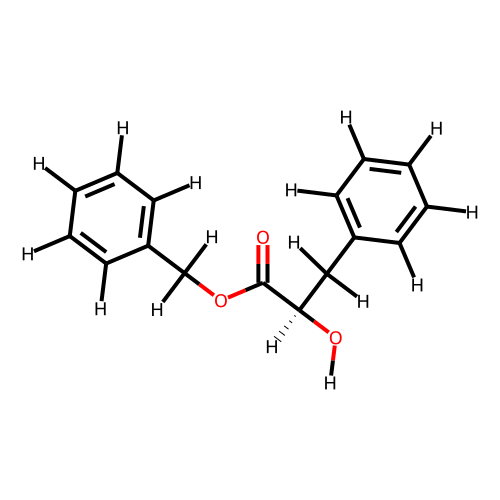

In [36]:
molecule = Molecule(BHP_pdb_path)
display(molecule)

### Generate the Rotamer library file
We are generating the Rotamer library and saving it to a file named __BHP.rot.assign__.

In [37]:
from peleffy.topology import RotamerLibrary

In [38]:
rotamer_library = RotamerLibrary(molecule)
rotamer_library.to_file('BHP.rot.assign')

### Parameterize with Open Force Field Toolkit and generate the Impact template
We parameterize the `Molecule`, using the __openff_unconstrained-1.2.0.offxml__ force field. However, in this case, instead of computing partial charges they are assigned from an extarnal file coming from external suites such as Jaguar. A __mae__ file with charges information is requiered. 

Then, the Impact template, named __bhpz__, is generated.

In [39]:
from peleffy.forcefield import OpenForceField
from peleffy.topology import Topology
from peleffy.template import Impact

In [40]:
from peleffy.utils import parse_charges_from_mae

In [41]:
openff = OpenForceField('openff_unconstrained-1.2.0.offxml')
parameters = openff.parameterize(molecule, charge_method='dummy')
parameters = parse_charges_from_mae(BHP_mae_path, parameters)

In [42]:
topology = Topology(molecule, parameters)

In [43]:
impact = Impact(topology)
impact.to_file('bhpz')

### Generate the Solvent parameters file
We generate the OBC2 Solvent parameters file, named ligandParams.txt.

In [44]:
from peleffy.solvent import OBC2

In [45]:
solvent = OBC2(topology)
solvent.to_file('ligandParams.txt')

 - Generating solvent parameters
